[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MaloADBA/ELE8812-demos/blob/main/Demos/Lesson%208/Leçon_8_Demo%20-%20Détection%20de%20contours%20(Conflit%20lié%20au%20codage%20Unicode).ipynb)

In [1]:
import numpy as np
from skimage import data
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
plt.style.use('seaborn-poster')

import pywt

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Exemple avec des données synthétiques

\begin{equation}
I(x,y) = \sin(a x) \sin(b y) e^{- (x^2 + y^2) / \sigma^2}
\end{equation}

In [2]:
def get_syntheticImage(a,b,s,c):
    x, y = np.meshgrid(np.linspace(-1,1,512), np.linspace(-1,1,512))
    img = np.abs(np.sin(x * a) * np.sin(y * b)) * np.exp(- (x**2 + y**2) / s**2)
    img += c * np.random.randn(*img.shape)
    return img 

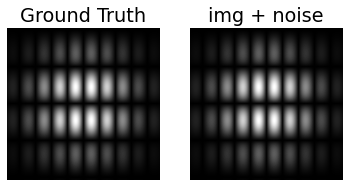

In [3]:
a = 15
b = 6.5
s = 0.65
c = 0.0
img = get_syntheticImage(a,b,s,c)
img_truth = get_syntheticImage(a,b,s,c=0)

plt.subplot(121); plt.imshow(img_truth, cmap='gray'); plt.axis('off'); plt.title('Ground Truth')
plt.subplot(122); plt.imshow(img, cmap='gray'); plt.axis('off'); plt.title('img + noise')
plt.show()

In [4]:
def display_pyramid(coeffs, normalize=True):
    nLevels = len(coeffs)
    nx, ny = coeffs[0].shape
    
    # Compute the pyramid total size
    for this_level in coeffs[1::]:
        nx += this_level[0].shape[0]
        ny += this_level[0].shape[1]
        
    # Prepare the pyramid
    mosaic = np.zeros((nx,ny), dtype=coeffs[0].dtype)
    approx = coeffs[0]
    if normalize:
        approx = (approx - approx.min()) / (approx.max() - approx.min())

    x0, y0 = approx.shape
    mosaic[0:x0, 0:y0] = approx
    
    # Fill the pyramid with the detail coefficients
    for iLevel, this_level in enumerate(coeffs[1::]):
        cH, cV, cD = this_level[:]
        if normalize:
            cH = (cH - cH.min()) / (cH.max() - cH.min())
            cV = (cV - cV.min()) / (cV.max() - cV.min())
            cD = (cD - cD.min()) / (cD.max() - cD.min())
        
        x1, y1 = cH.shape
        mosaic[x0:x0+x1,0:y1] = cH
        mosaic[0:x1,y0:y0+y1] = cV
        mosaic[x0:x0+x1,y0:y0+y1] = cD
        x0 += x1
        y0 += y1
    
    plt.imshow(mosaic, cmap='gray')
    plt.show()

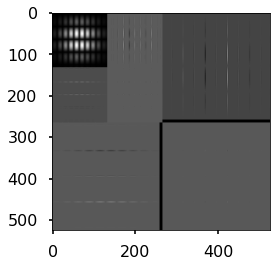

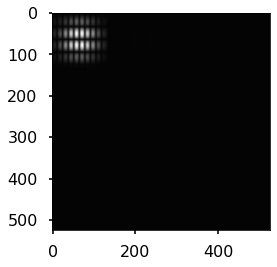

In [5]:
# Wavelet decomposition at 3 levels
wavelet = 'sym4'
coeffs = pywt.wavedec2(img, wavelet, level=2)
display_pyramid(coeffs)

arr, coeff_slices = pywt.coeffs_to_array(coeffs)
plt.imshow(arr, cmap='gray'); plt.show()

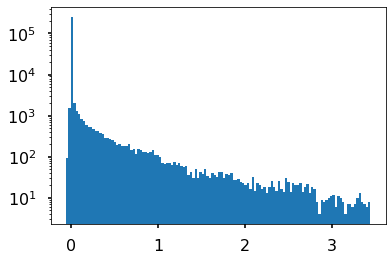

In [6]:
plt.hist(arr.ravel(), 128, log=True); plt.show()

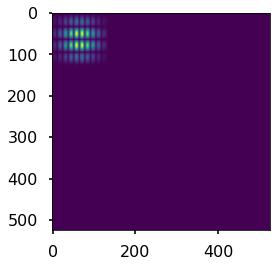

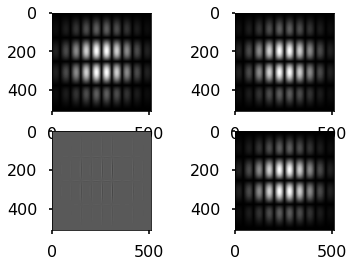

In [7]:
arr_p = arr * (np.abs(arr) >= 0.5)
arr_p[coeff_slices[0]] = arr[coeff_slices[0]]
plt.imshow(arr_p); plt.show()

# New position
coeffs_p = pywt.array_to_coeffs(arr_p, coeff_slices, output_format='wavedec2')
img_p = pywt.waverec2(coeffs_p, wavelet)


plt.subplot(221); plt.imshow(img, cmap='gray');
plt.subplot(222); plt.imshow(img_p, cmap='gray'); 
plt.subplot(223); plt.imshow(img_p - img, cmap='gray'); 
plt.subplot(224); plt.imshow(img_truth, cmap='gray'); 
plt.show()